# Stable Marriage
In this exercise, we will implement the stable marriage algorithm using randomly generated preference list. We will import the file matching.py as follows and use the matchmaker function. The input to this function is composed of two dictionaries. The first dictionary, called 'residentprefers', has each key corresponding to each resident and the value corresponding to the hospital preference list of the residents. The second dictionary, called 'hospitalprefers',is vice versa. For example, if there are 2 residents and 3 hospitals, then a possible input is: residentprefers = {1:[2,1,3], 2: [1,2,3]}, hospitalprefers = {1:[1,2], 2:[1,2], 3:[2,1]}. Note that the number of residents need not be the same as the number of hospitals. Let us now find a stable matching for this example.

In [1]:
import matching
import numpy as np

In [2]:
residentprefers = {1:[2,1,3], 2: [1,2,3]}
hospitalprefers = {1:[1,2], 2:[1,2], 3:[2,1]}

engaged = matching.matchmaker(residentprefers,hospitalprefers)
print(engaged)

{2: 1, 1: 2}


As we can see, the stable matching results in resident 1 paired with hospital 2, resident 2 paired with hospital 1, and hospital 3 is unpaired.

Let us now analyze the satisfaction of the matching, which will be defined as follows. Let $n_1$ and $n_2$ be the number of residents and hospitals, respectively. For a given matching, for each resident $i = 1,2,\dots, n_1$, let $m(i)$ be the hospital that $i$ is matched to. Let $x(i)$ be the position in the preference list of resudent $i$ that $m(i)$ appears in. In the previous example, $m(1) = 2$ and $x(1) = 1$. Similarly $m(2) = 1$ and $x(1) = 1$. Similarly, for the same matching, for each hospital $j = 1,2,\dots,n_2$, let $y(j)$ be the position of hospital $j$'s matched resident in $j$'s preference list. In the example, $y(1) = 3$, $y(2) = 1$ and $y(3)$ is not defined. Using this, for a given matching, we define the average satisfaction of all the residents to be: $\sum_{i=1}^{n_1} \dfrac{x_i}{n_1^2}$. Correspondingly, the average satisfaction of all the hospitals is defined to be: $\sum_{j=1}^{n_2} \dfrac{y_j}{n_2^2}$. Note that if $y(j)$ is not defined for a certain $j$, we set $y(j) = 0$.

## Q1. Generate random instances and analyze the satsifaction of the matching

First, write a function that takes the preference lists and the matching as inputs and returns the satisfaction values.

In [3]:
def satisfaction(residentprefers,hospitalprefers,engaged):
    #------------ Your code here ----------- #
    resX = 0 # satisfaction for residents
    resY = 0 # satisfaction for hospitals
    for key, value in engaged.items():
        tmpX = residentprefers[value].index(key)+1
        resX += tmpX
        tmpY = hospitalprefers[key].index(value)+1
        resY += tmpY
    resX /= (len(residentprefers) ** 2)
    resY /= (len(hospitalprefers) ** 2)
    return (resX, resY) # the first element of tuple is the satisfaction of residents, the second is for hospitals
    
    #---------------------------------- #
print(satisfaction(residentprefers,hospitalprefers,engaged))

(0.5, 0.3333333333333333)


Next, write a function that takes as inputs $n_1$ and $n_2$ and returns a random permutation of preference lists for residents and hospitals. You may use the np.random.permutation() function.

In [4]:
def generate_random_instance(n1,n2):
    #------------- your code here -----------#
    residentprefers = {}
    hospitalprefers = {}
    for i in range(1, n1+1):
        residentprefers[i] = np.random.permutation(np.arange(1, n2+1)).tolist()
    for j in range(1, n2+1):
        hospitalprefers[j] = np.random.permutation(np.arange(1, n1+1)).tolist()
    return (residentprefers, hospitalprefers)   
    
#------------- your code here -----------#
print(generate_random_instance(3,3))

({1: [3, 1, 2], 2: [1, 3, 2], 3: [1, 2, 3]}, {1: [1, 2, 3], 2: [2, 1, 3], 3: [2, 1, 3]})


Now, we would like to analyze how the resident and hospital satisfactions depend on $n_1$ and $n_2$. To do this, we first set $n_1=n_2=n$ and study three different values for $n \in \{10,50,100\}$. Then, create $100$ random instances of preference lists and compute the average satisfaction values over all the instances. Plot two graphs, one for the average resident satisfaction and the other, for the average hospital satisfaction (the x-axis being $n$ in both the plots).

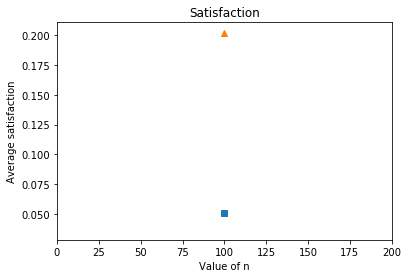

In [5]:
def match_compute_plot(n):
    #----------- Your code here -----------#
    satX = []
    satY = []
    for i in range(100):
        residentprefers, hospitalprefers = generate_random_instance(n, n)
        engaged = matching.matchmaker(residentprefers,hospitalprefers)
        tmpX, tmpY = satisfaction(residentprefers,hospitalprefers, engaged)
        satX.append(tmpX)
        satY.append(tmpY)
    avgX = sum(satX)/len(satX)
    avgY = sum(satY)/len(satY)
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots()
    ax.set_xlim(left = 0, right = 2 * n)
    ax.scatter(n, avgX, marker = 's')
    ax.scatter(n, avgY, marker = '^')
    ax.set_xlabel("Value of n")
    ax.set_ylabel("Average satisfaction")
    ax.set_title('Satisfaction')
    return fig
    
    #--------------------------------------#
match_compute_plot(10)
match_compute_plot(50)
match_compute_plot(100)

## Q2. Generate and analyze satisfactions for different $n_1$ and $n_2$

Now, we set $n_1 = n$ and $n_2 = n+1$ and repeat Q1 (plot a pair of graphs for resident and hospital satisfactions with x axis being $n \in \{10,50,100\}$).

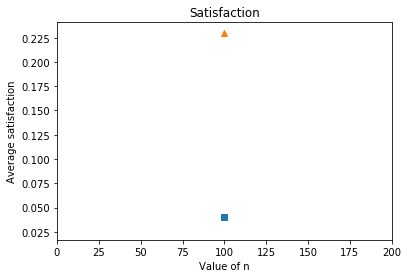

In [6]:
def match_compute_plot(n):
    #----------- Your code here -----------#
    satX = []
    satY = []
    for i in range(100):
        residentprefers, hospitalprefers = generate_random_instance(n, n+1)
        engaged = matching.matchmaker(residentprefers,hospitalprefers)
        tmpX, tmpY = satisfaction(residentprefers,hospitalprefers, engaged)
        satX.append(tmpX)
        satY.append(tmpY)
    avgX = sum(satX)/len(satX)
    avgY = sum(satY)/len(satY)
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots()
    ax.set_xlim(left = 0, right = 2 * n)
    ax.scatter(n, avgX, marker = 's')
    ax.scatter(n, avgY, marker = '^')
    ax.set_xlabel("Value of n")
    ax.set_ylabel("Average satisfaction")
    ax.set_title('Satisfaction')
    return fig
    
    #--------------------------------------#
match_compute_plot(10)
match_compute_plot(50)
match_compute_plot(100)

Now, we set $n_1 = n$ and $n_2 \in n+2$ and repeat Q1 (plot a pair of graphs for resident and hospital satisfactions with x axis being $n \in \{10,50,100\}$).

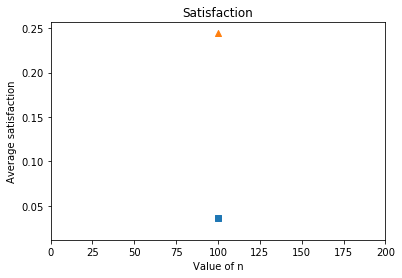

In [7]:
def match_compute_plot(n):
    #----------- Your code here -----------#
    satX = []
    satY = []
    for i in range(100):
        residentprefers, hospitalprefers = generate_random_instance(n, n+2)
        engaged = matching.matchmaker(residentprefers,hospitalprefers)
        tmpX, tmpY = satisfaction(residentprefers,hospitalprefers, engaged)
        satX.append(tmpX)
        satY.append(tmpY)
    avgX = sum(satX)/len(satX)
    avgY = sum(satY)/len(satY)
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots()
    ax.set_xlim(left = 0, right = 2 * n)
    ax.scatter(n, avgX, marker = 's')
    ax.scatter(n, avgY, marker = '^')
    ax.set_xlabel("Value of n")
    ax.set_ylabel("Average satisfaction")
    ax.set_title('Satisfaction')
    return fig
    #--------------------------------------#
match_compute_plot(10)
match_compute_plot(50)
match_compute_plot(100)

Now, we set $n_1 = n$ and $n_2 \in 2n$ and repeat Q1 (plot a pair of graphs for resident and hospital satisfactions with x axis being $n \in \{10,50,100\}$).

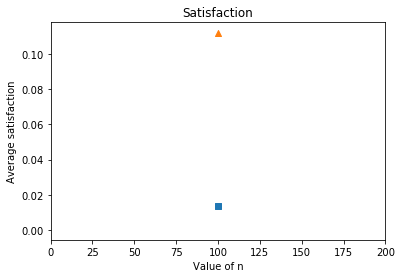

In [8]:
def match_compute_plot(n):
    #----------- Your code here -----------#
    satX = []
    satY = []
    for i in range(100):
        residentprefers, hospitalprefers = generate_random_instance(n, n*2)
        engaged = matching.matchmaker(residentprefers,hospitalprefers)
        tmpX, tmpY = satisfaction(residentprefers,hospitalprefers, engaged)
        satX.append(tmpX)
        satY.append(tmpY)
    avgX = sum(satX)/len(satX)
    avgY = sum(satY)/len(satY)
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots()
    ax.set_xlim(left = 0, right = 2 * n)
    ax.scatter(n, avgX, marker = 's')
    ax.scatter(n, avgY, marker = '^')
    ax.set_xlabel("Value of n")
    ax.set_ylabel("Average satisfaction")
    ax.set_title('Satisfaction')
    return fig

    #--------------------------------------#
match_compute_plot(10)
match_compute_plot(50)
match_compute_plot(100)